# ***Multiple Linear Regression***

# ***Table of content***

>[Multiple Linear Regression](#scrollTo=2op33B6J1x7g)

>>[Data Dictionary](#scrollTo=7iFHetAB7b8J)

>>[Explonatory Data Analysis](#scrollTo=maKAvcFQ7Rjs)

>>>[Understanding/exploring the dataset](#scrollTo=ILdcZ_ggXHmG)

>>[Data pre-processing](#scrollTo=I8ZQ7aay8Qon)

>>>[Statistical summary of the numerical features](#scrollTo=0lOLQPgD-Zcn)

>>>[EDA Summary](#scrollTo=0FJI_E1TB2Fc)

>>[Predictiong the resting blood pressure by taking age and cholesterol as the influencing parameters.](#scrollTo=g3LMYIngWE05)

>>>[Multiple linear regression](#scrollTo=lOVfPwunv520)

>>>>[Aim: To use the heart dataset to predict the resting blood pressure based on age as the factor affecting it.](#scrollTo=dKGXoa-vv9Zw)

>>>>[Visualization of the target variable [age] and resting blood pressure.](#scrollTo=2GCAGVJDXYHI)

>>>>[Model building](#scrollTo=fCnomMo-ZUOZ)

>>>>[Model Adequecy](#scrollTo=W0l_2SPZZ7_a)

>>>>[Residual plot](#scrollTo=_RzbJd4zaW-z)

>>>>[Normality test of the residuals](#scrollTo=-8Kq5WtQafVy)

>>>[Conclusion](#scrollTo=BjntWwHCameb)



Link for dataset:

https://drive.google.com/file/d/1TVEX8eDq7n3FOZX2GIBqnj-Gll6We3-F/view?usp=sharing

## ***Data Dictionary***
1. age: age in years

2. sex: sex
*  1 = male
*  0 = female

3. cp: chest pain type
*   Value 0: typical angina
*   Value 1: atypical angina
*   Value 2: non-anginal pain
*   Value 3: asymptomatic

4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)

5. chol: serum cholestoral in mg/dl

6. fbs: (fasting blood sugar > 120 mg/dl)
*   1 = true
*   0 = false

7. restecg: resting electrocardiographic results
*   Value 0: normal
*   Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
*   Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalach: maximum heart rate achieved

9. exang: exercise induced angina
*   1 = yes
*   0 = no

10. oldpeak = ST depression induced by exercise relative to rest

11. slope: the slope of the peak exercise ST segment
* Value 0: upsloping
* Value 1: flat
* Value 2: downsloping

12. ca: number of major vessels (0-3) colored by flourosopy
13. thal:
* 0 = error (in the original dataset 0 maps to NaN's)
* 1 = fixed defect
* 2 = normal
* 3 = reversable defect

14. target (the lable):
* 0 = no disease,
* 1 = disease

Diagnosis of heart disease (angiographic disease status)
* Value 0: < 50% diameter narrowing
* Value 1: > 50% diameter narrowing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as exp

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from IPython.core.display import HTML
from scipy.stats import uniform

## ***Explonatory Data Analysis***

In [ ]:
# Loading the dataset
dataset = pd.read_csv('/content/drive/MyDrive/SML/Datasets/heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### ***Understanding/exploring the dataset***

In [ ]:
dataset.shape

(303, 14)

The dataset has 303 observations with 14 different categories some being numerical and some categorical forms.

In [ ]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

The above are the 14 different categories of the dataset.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The above gives us the information of the dataset in detail.

## ***Data pre-processing***

Drop faulty data \
Based on the proper observation of the dataset. Here we will be dropping 7 rows.

In [ ]:
dataset = dataset[dataset['ca'] < 4] #drop the wrong ca values
dataset = dataset[dataset['thal'] > 0] # drop the wong thal value
print(f'The length of the data now is {len(dataset)} instead of 303!')

The length of the data now is 296 instead of 303!


We rename the columns for the sake of clarity.\
We also replace the coded categories(0,1,2,..) to their medical meaning ('atypical angina', 'typical angina', etc. for example)

In [ ]:
dataset = dataset.rename(
    columns = {'cp':'chest_pain_type',
               'trestbps':'resting_blood_pressure',
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram',
               'thalach': 'max_heart_rate_achieved',
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression',
               'slope': 'st_slope',
               'ca':'num_major_vessels',
               'thal': 'thalassemia'},
    errors="raise")

In [ ]:
dataset['sex'][dataset['sex'] == 0] = 'female'
dataset['sex'][dataset['sex'] == 1] = 'male'

dataset['chest_pain_type'][dataset['chest_pain_type'] == 0] = 'typical angina'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 1] = 'atypical angina'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 2] = 'non-anginal pain'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 3] = 'asymptomatic'

dataset['fasting_blood_sugar'][dataset['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dataset['fasting_blood_sugar'][dataset['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dataset['resting_electrocardiogram'][dataset['resting_electrocardiogram'] == 0] = 'normal'
dataset['resting_electrocardiogram'][dataset['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
dataset['resting_electrocardiogram'][dataset['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

dataset['exercise_induced_angina'][dataset['exercise_induced_angina'] == 0] = 'no'
dataset['exercise_induced_angina'][dataset['exercise_induced_angina'] == 1] = 'yes'

dataset['st_slope'][dataset['st_slope'] == 0] = 'upsloping'
dataset['st_slope'][dataset['st_slope'] == 1] = 'flat'
dataset['st_slope'][dataset['st_slope'] == 2] = 'downsloping'

dataset['thalassemia'][dataset['thalassemia'] == 1] = 'fixed defect'
dataset['thalassemia'][dataset['thalassemia'] == 2] = 'normal'
dataset['thalassemia'][dataset['thalassemia'] == 3] = 'reversable defect'

In [ ]:
dataset.dtypes

age                            int64
sex                           object
chest_pain_type               object
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar           object
resting_electrocardiogram     object
max_heart_rate_achieved        int64
exercise_induced_angina       object
st_depression                float64
st_slope                      object
num_major_vessels              int64
thalassemia                   object
target                         int64
dtype: object

In [ ]:
dataset.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


Now, we group the three datatypes object,int and floats according to their type.

In [ ]:
#numerical fearures 6
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# caterorical (multi-)
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

In [ ]:
dataset[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
num_major_vessels,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0


### ***Statistical summary of the numerical features***

1. Age
* The average age in the dataset is 54.5 years
* The oldest is 77 years, whereas the youngest is 29 years old

2. Cholesterol
* The average registered cholestrol level is 247.15
* Maximum level is 564 and the minimum level is 126.\
A healthy cholesterol level is  less than 200mg/dl and usually high level of cholesterol is associated with heart disease.

3. Resting blood pressure
* 131 mean, 200 max and 94 min

4. Max heart rate achieved
* The average max heart rate registered is 149.5 bpm. The Maximum and the minumum are 202 and 71bpm respectively.

5. St_depression
* The average value of st_dpression is 1.06. Max is 6.2 and the minimum is 0.

6. Number of major blood vessels
* A maximum of 3 and a minimum of 0 major blood vessels are observed. The mean value is 0.68.

Distribution density plot

Text(0.5, 0.98, 'Distribution of Numerical Features')

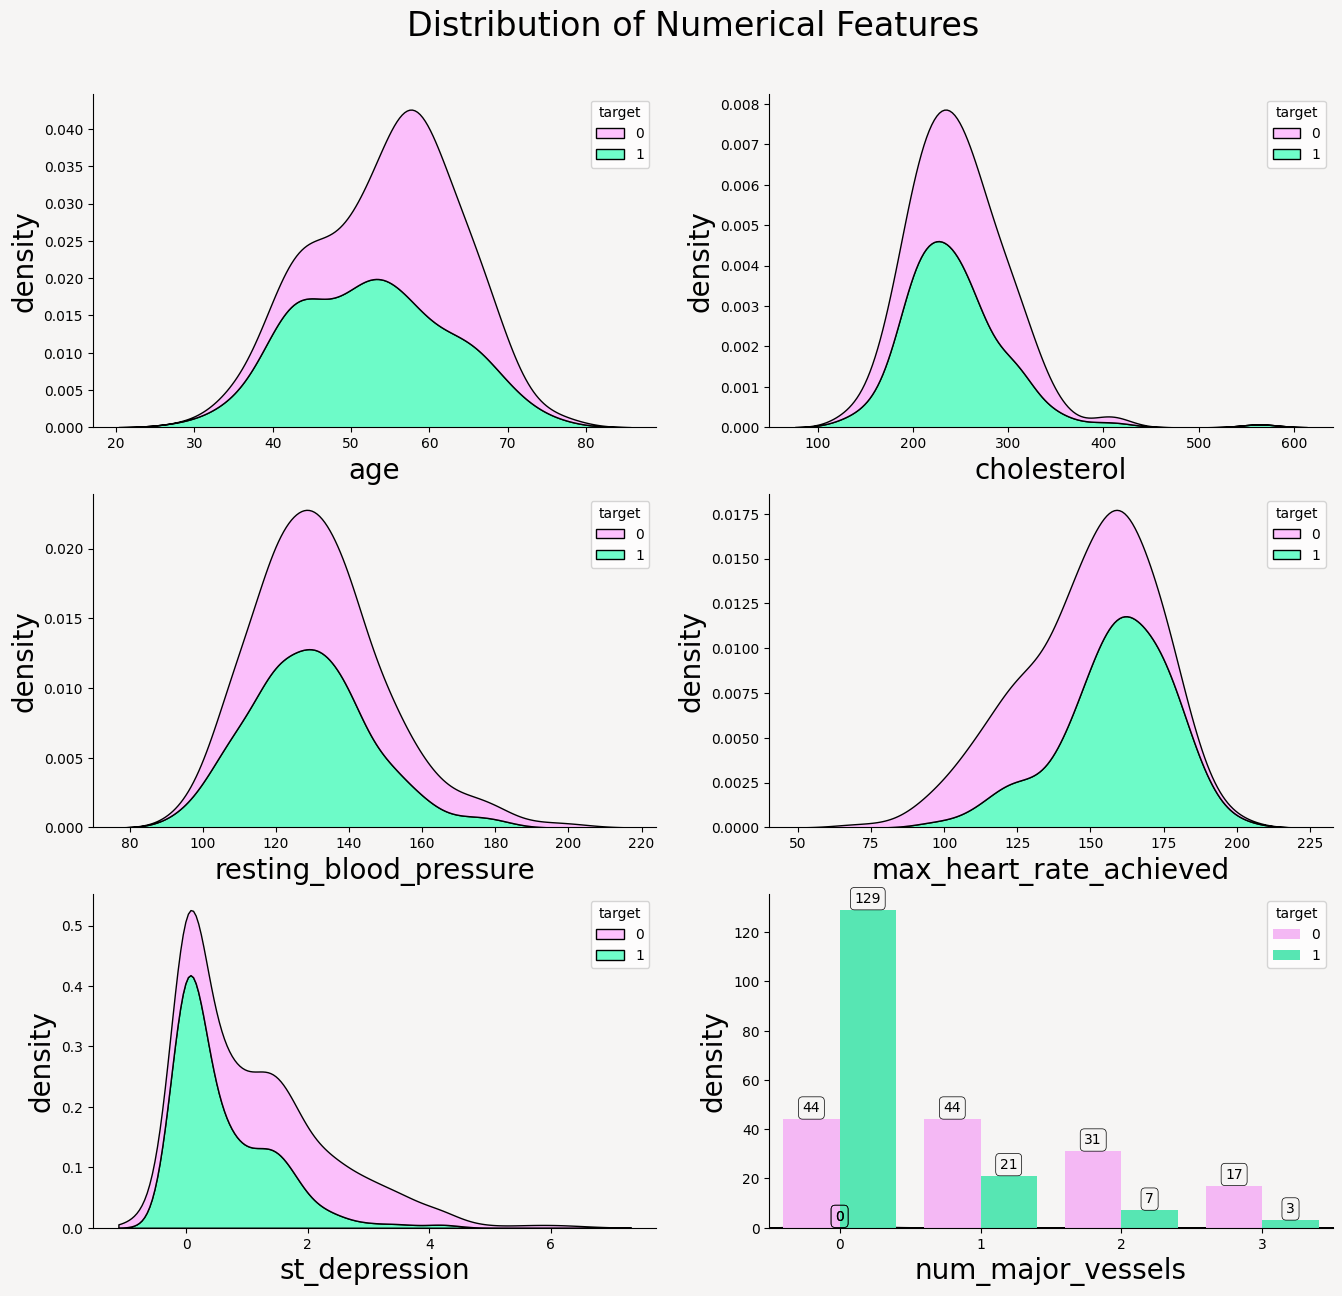

In [ ]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))
#remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14),facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')

    ax = sns.kdeplot(data=dataset, x=col, hue="target", multiple="stack", palette=mypal[1::4])
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)

    if col == 'num_major_vessels':
        sns.countplot(data=dataset, x=col, hue="target", palette=mypal[1::4])
        for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                      bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

    i = i +1
plt.suptitle('Distribution of Numerical Features' ,fontsize = 24)

Text(0.5, 0.98, 'Pairplot: Numerical Features ')

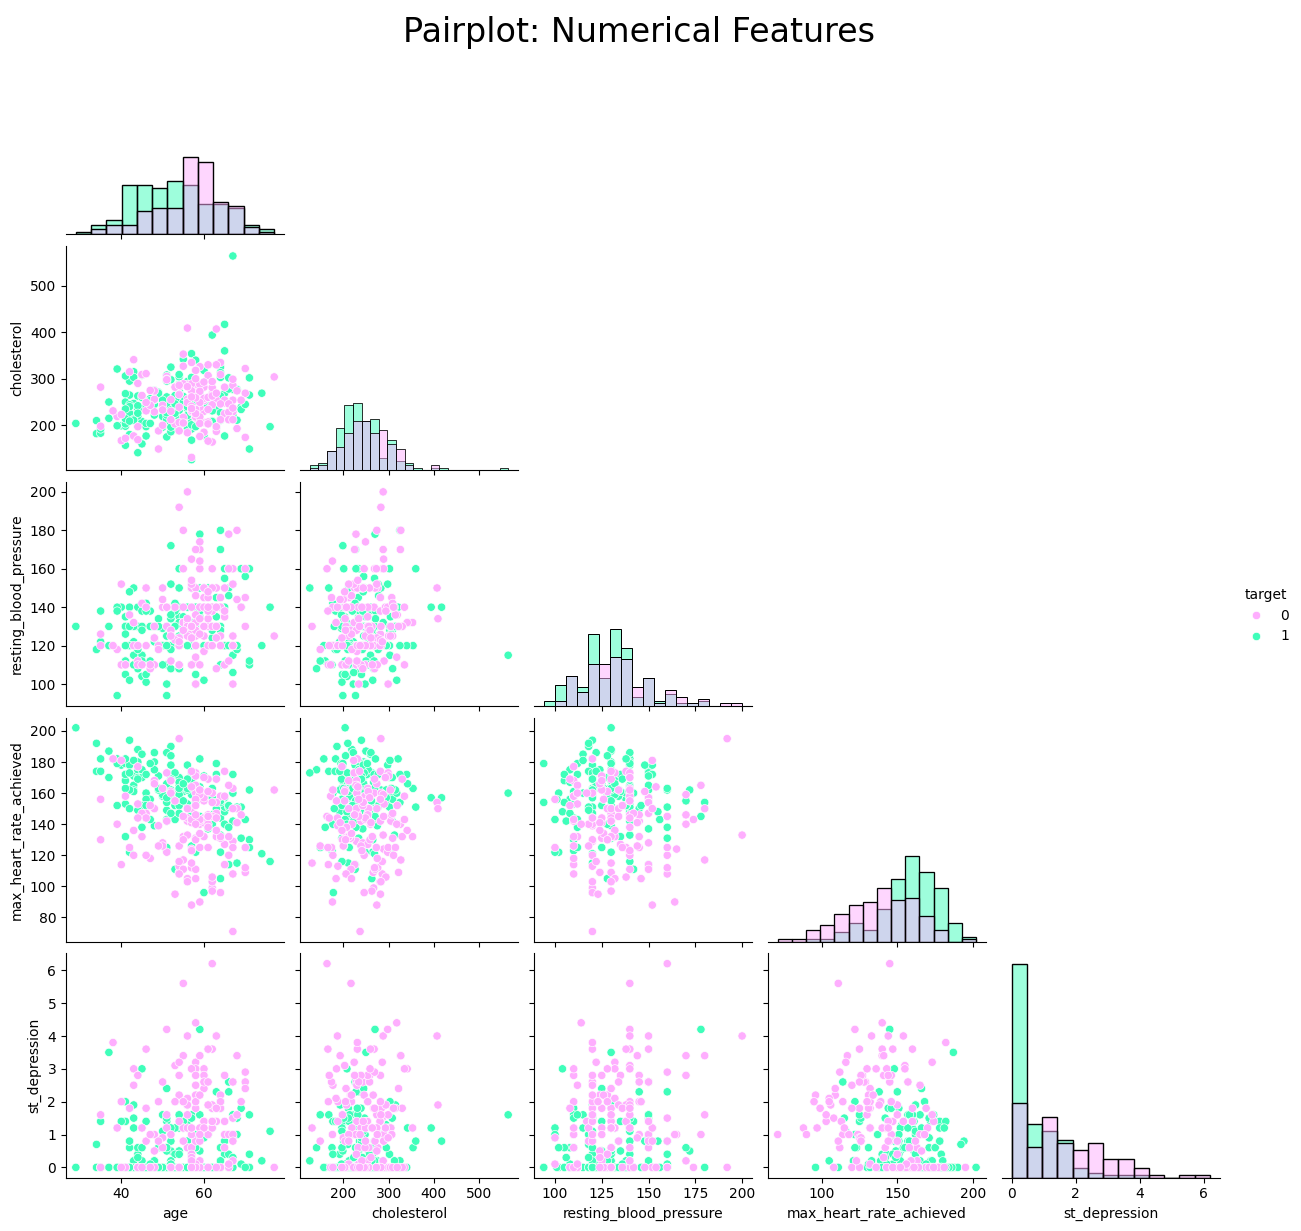

In [ ]:
_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'target']
data_ = dataset[_]
g = sns.pairplot(data_, hue="target", corner=True, diag_kind='hist', palette=mypal[1::4]);
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24)

Below are reg-plots of some selected features showing the linear relation with Age, similar to the first column in the pair-plot above. We observe that:

* Except maximum_heart_rate_achieved, the others are positively and linearly related with age (a weaker relation with st_depression).
* Younger patients with higher maximum_heart_rate_achieved are more likely to have a heart condition.
* Lower st_depression regardless of age is also likely an indication of a heart disease.

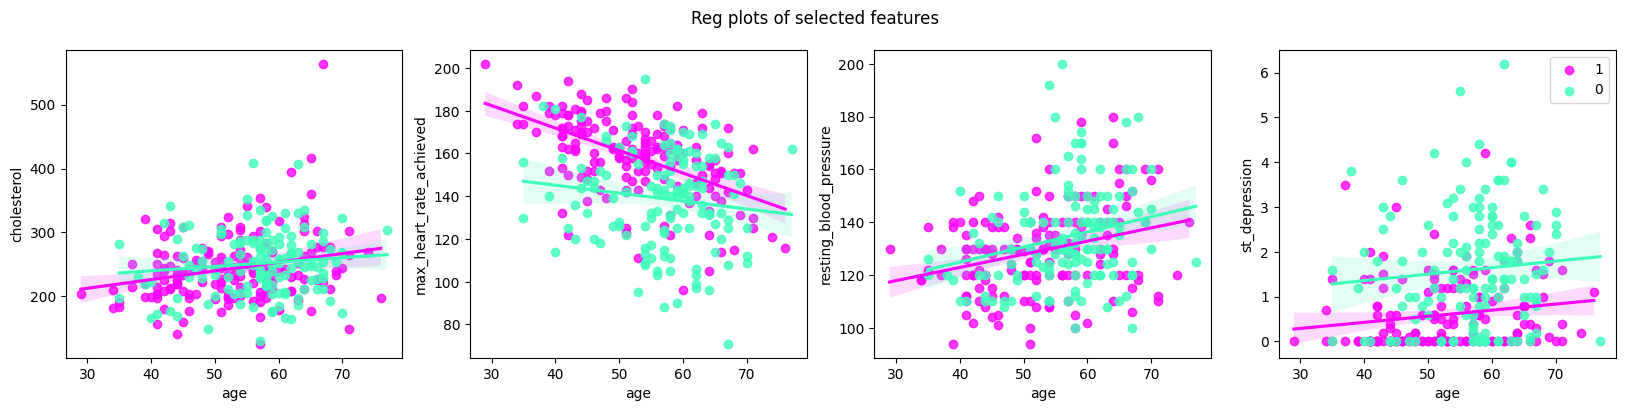

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20, 4))
sns.regplot(data=dataset[dataset['target'] ==1], x='age', y='cholesterol', ax = ax[0], color=mypal[0], label='1')
sns.regplot(data=dataset[dataset['target'] ==0], x='age', y='cholesterol', ax = ax[0], color=mypal[5], label='0')
sns.regplot(data=dataset[dataset['target'] ==1], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[0], label='1')
sns.regplot(data=dataset[dataset['target'] ==0], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[5], label='0')
sns.regplot(data=dataset[dataset['target'] ==1], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[0], label='1')
sns.regplot(data=dataset[dataset['target'] ==0], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[5], label='0')
sns.regplot(data=dataset[dataset['target'] ==1], x='age', y='st_depression', ax = ax[3], color=mypal[0], label='1')
sns.regplot(data=dataset[dataset['target'] ==0], x='age', y='st_depression', ax = ax[3], color=mypal[5], label='0')
plt.suptitle('Reg plots of selected features')
plt.legend()

**Categorical features**\
Distribution: Count plots

0

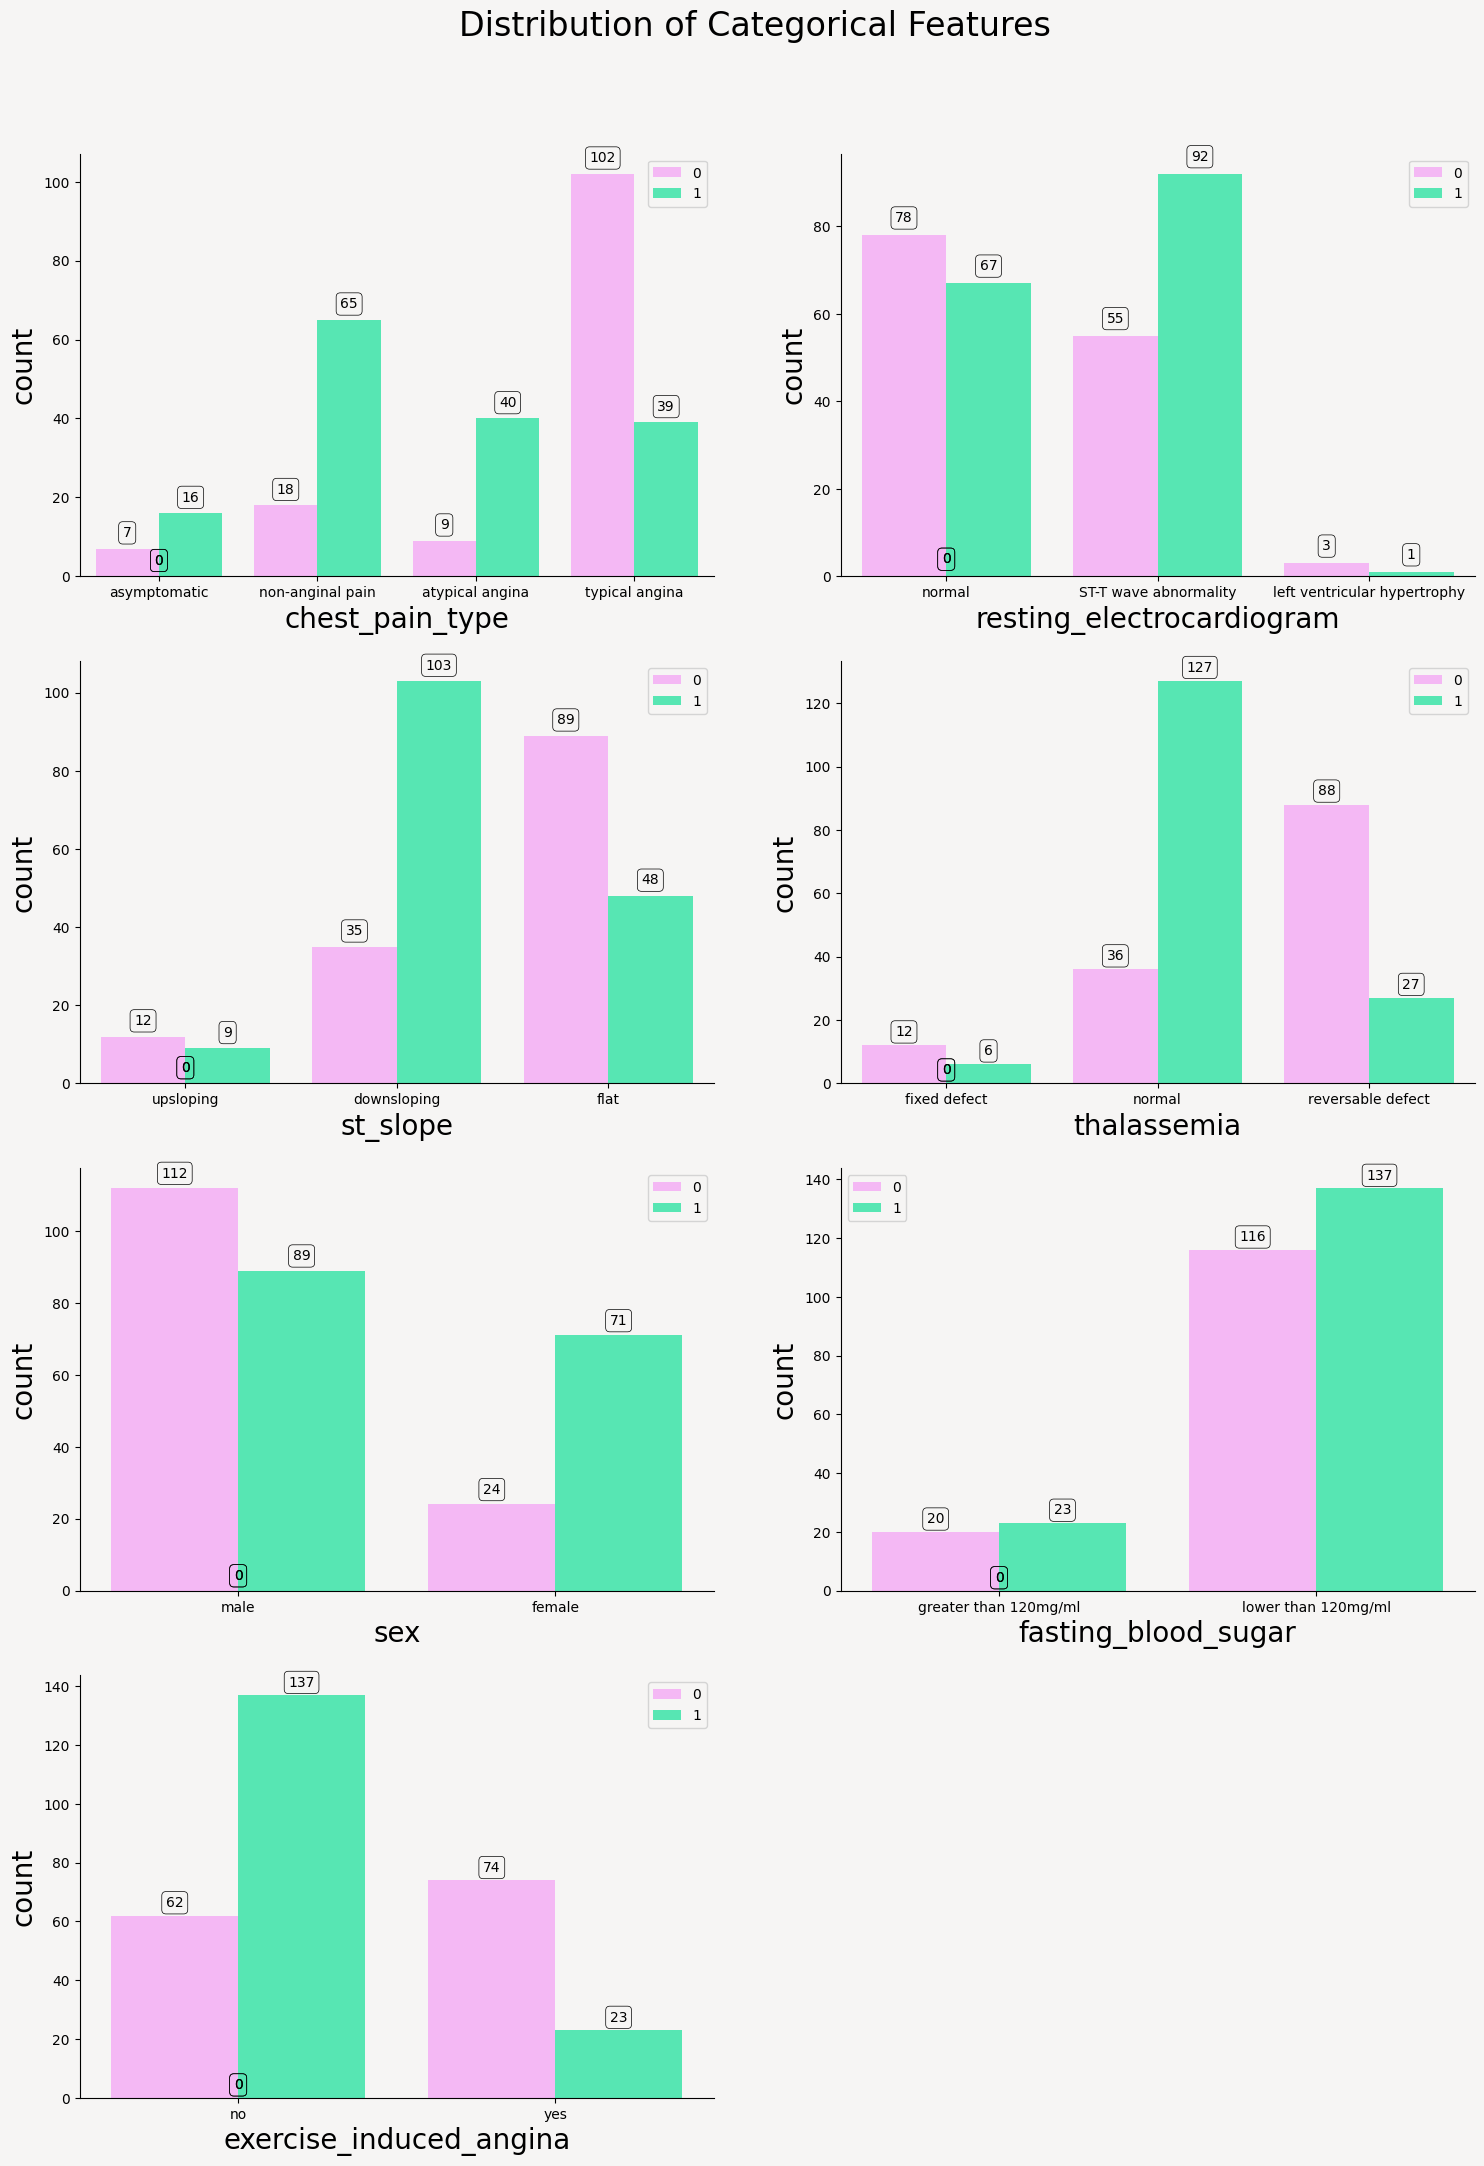

In [ ]:
def count_plot(data, cat_feats):
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 24), facecolor='#F6F5F4')
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        ax = sns.countplot(data=dataset, x=col, hue="target", palette=mypal[1::4])
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False)
        plt.legend(facecolor='#F6F5F4')

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                  bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

        i = i +1

    plt.suptitle('Distribution of Categorical Features' ,fontsize = 24)
    return 0

count_plot(dataset, cat_feats[0:-1])

### ***EDA Summary***
* Data size: 303 rows and 14 columns (13 independent + one target variable) > later reduced to 296 after removing faulty data points!
* Data has no missing values
* Features (columns) data type:
   * Six features are numerical
   * The rest (seven features) are categorical variables


## ***Predictiong the resting blood pressure by taking age and cholesterol as the influencing parameters.***

### ***Multiple linear regression***

#### ***Aim:*** To use the heart dataset to predict the resting blood pressure based on age as the factor affecting it.

#### ***Visualization of the target variable [age] and resting blood pressure.***

*1. Distibution plot for the dependent variable [resting blood pressure]*

Studying how age and cholesterol influneces the resting blood pressure, then age and cholestrol would be considered the independent variables, and resting blood pressure would be the dependent variable.

<Axes: title={'center': 'Distribution of Resting blood pressure'}, xlabel='resting_blood_pressure', ylabel='Density'>

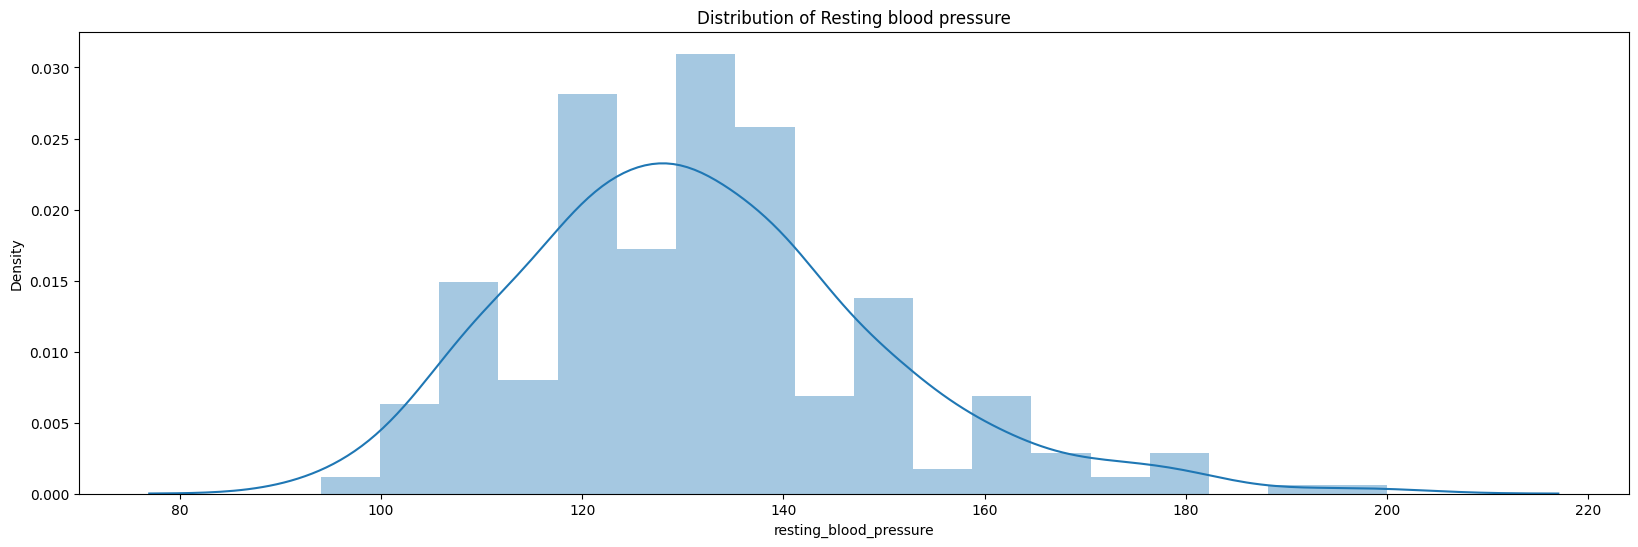

In [ ]:
### Plotting the distribution of resting blood pressure

plt.figure(figsize=(20,6))
plt.title('Distribution of Resting blood pressure')
sns.distplot(dataset.resting_blood_pressure)

From the above graph, we see that the distribution of the dependent variable resting blood pressure have a normal distribution.

*2. Heatmap of all the Data*

<Axes: >

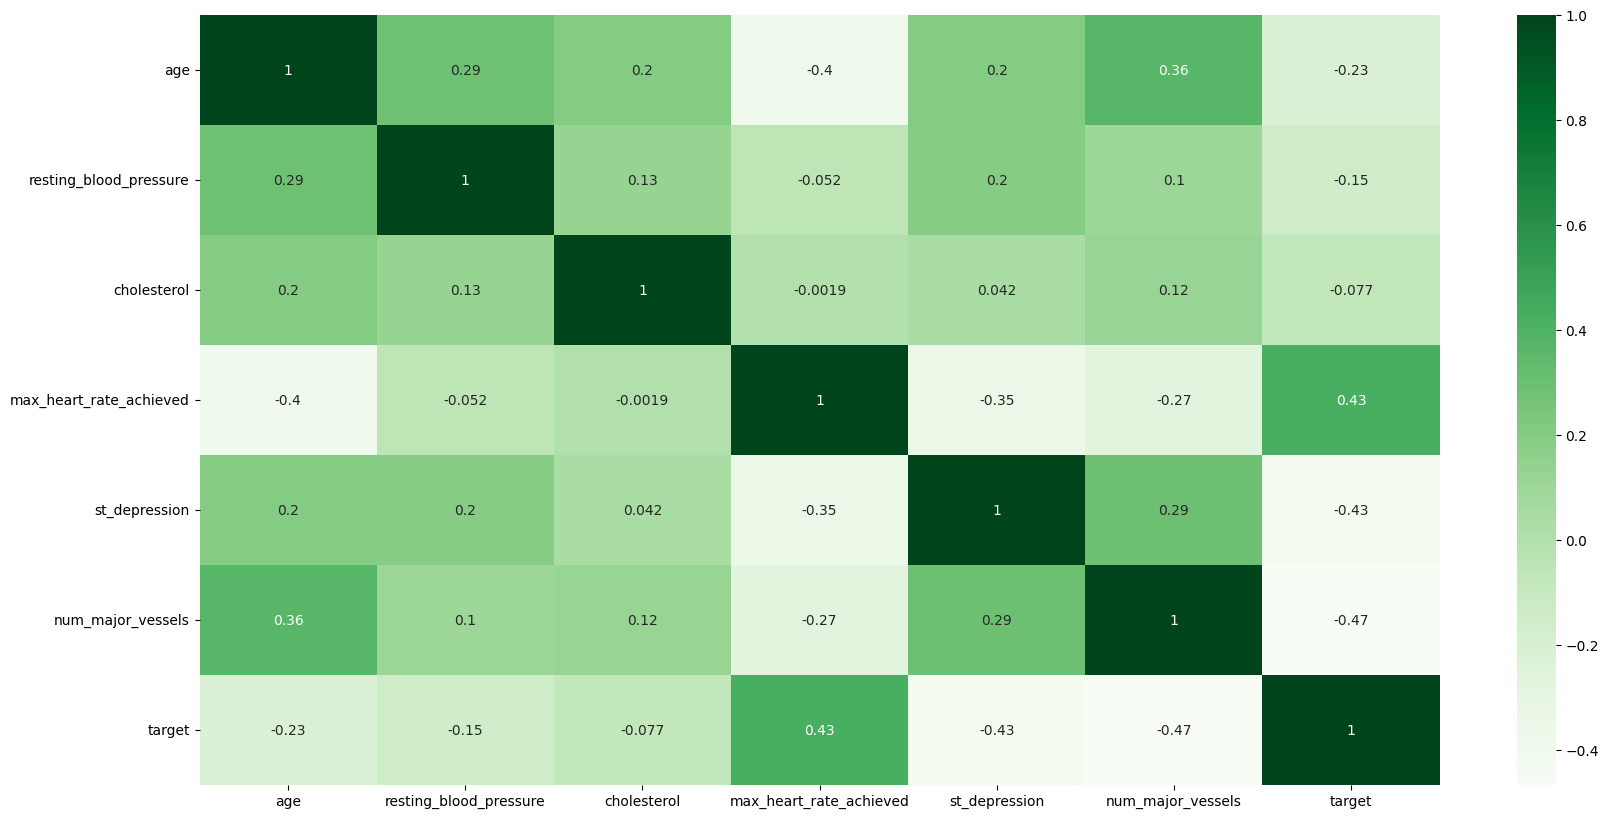

In [ ]:
num_vars=dataset.select_dtypes(include=['float64','int64']).columns
plt.figure(figsize = (20,10))
sns.heatmap(dataset[num_vars].corr(),cmap="Greens",annot = True)

The above heat map shows the correlation of the variables.

*3. Scatter plot matix of resting blood pressure, age and cholesterol.*

In [ ]:
## Plotting the scatter Plot Matrix

exp.scatter_matrix(dataset,dimensions =["age","cholesterol","resting_blood_pressure"])

The above is the scatter plot for the three varaibles under study being age, cholestrol and resting blood pressure.\
We infer from the above graph as the relationship between the age and cholestrol is posy=tive moderate.

#### ***Model building***

In [ ]:
# Separate the feature (X) and target variable (y)
X = dataset[['age','cholesterol']]
y = dataset['resting_blood_pressure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We distribute the dataset to train and test the dataset. We we have chosen 80% of the dataset for training and the remaining 20% for testing. So, 242 observations go for training and 61 for testing.

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 64 to 104
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          236 non-null    int64
 1   cholesterol  236 non-null    int64
dtypes: int64(2)
memory usage: 5.5 KB


In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 236 entries, 64 to 104
Series name: resting_blood_pressure
Non-Null Count  Dtype
--------------  -----
236 non-null    int64
dtypes: int64(1)
memory usage: 3.7 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 280 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          60 non-null     int64
 1   cholesterol  60 non-null     int64
dtypes: int64(2)
memory usage: 1.4 KB


In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 60 entries, 280 to 99
Series name: resting_blood_pressure
Non-Null Count  Dtype
--------------  -----
60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [ ]:
# Create a simple linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Print the coefficient and intercept
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

Coefficient: [0.50610754 0.0396432 ]
Intercept: 93.46920688198242


Model will be:
***Resting blood pressure = B0 + B1 * Age + B2 * Cholestrol + E[error]*** \
After fitting the model, we have the regression coefficient B0 = 97.1692, B1 = 0.4850 and B2 = 0.027\
We conclude based on these results as, if B0 is zero and B2 is fixed then a unit change in age leads to an increase in resting blood pressure by 0.4850.\
If B0 is zero and B1 is fixed then a unit change in cholestrol will increase resting blood pressure by 0.027.\
And if B1 and B2 are zero, then the average rate of change in resting blood pressure is 97.1692.

#### ***Model Adequecy***

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)
y_pred


array([127.21333118, 118.79446493, 149.73717619, 131.60047218,
       124.17531291, 128.977394  , 124.4898315 , 132.54790891,
       129.43197728, 122.58695794, 135.91095378, 135.27403559,
       133.04876244, 133.22847034, 132.13696886, 125.05409033,
       132.67083855, 133.20070819, 135.61231629, 126.35043485,
       138.60931832, 134.08211262, 121.92890466, 129.25226939,
       120.71847358, 129.92883077, 133.17957309, 126.7032236 ,
       120.33392265, 131.38637509, 135.43260839, 131.62160728,
       119.03232412, 129.90769567, 133.52710783, 123.67583242,
       131.34410488, 134.07285857, 131.74316388, 134.06360452,
       130.34639786, 128.40788115, 137.42402239, 123.59654602,
       139.90828984, 133.77422108, 141.3750882 , 127.91365467,
       133.46632953, 135.29917074, 128.34047581, 123.01115208,
       122.06896935, 123.68508646, 131.09436464, 121.60250502,
       126.55127785, 125.33159273, 125.34347378, 130.04513337])

In [ ]:
print(r2_score(y_test,y_pred))

0.05561303083018321


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 327.7492353206713
R-squared: 0.05561303083018321


The mean square error of the model is obatined by taking the square of difference if the predicted and observed dependent variable that is resting blood pressure.\
The R-squared value gives the overall goodness of fit if the model.\
Here we have the mean square error as 384.7986, whic says us the baisedness in the model is square root of 386.7473\
The R-squared value is -0.0385, which negative 4% of the variation is explained by age and cholestrol for resting blood pressure.\
Since the R-squared value is -0.0385, it indicated the poor fitting of the model.
Basically we can conclude that the model is not a better fit.\
We still proceed for the residual plot as follows.

#### ***Residual plot***

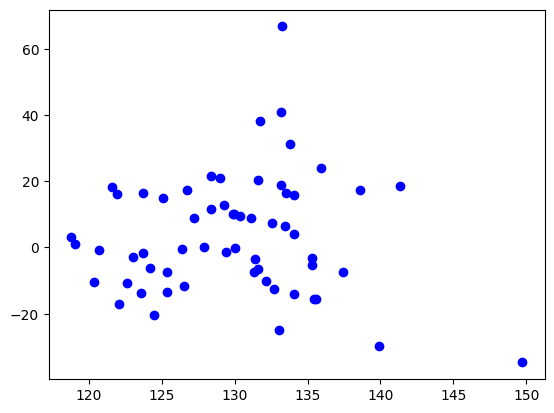

In [ ]:
resid= y_test - y_pred
plt.scatter(y_pred,resid,color="blue",linewidth=1)

plt.show()

The pattern of the residual plot is random. This does not give us nay information about the linearity of the variables as well as the constant variance.

#### ***Normality test of the residuals***

In [ ]:
from scipy.stats import shapiro
shapiro(resid)

ShapiroResult(statistic=0.9656380414962769, pvalue=0.08904151618480682)

We see that the p-value is 0.3898. This indicates that the errors follow normal distribution because, we fail to reject the null hypothesis here as the p-value is greater than the signifiacnce level.

### ***Conclusion***

Using Heart Data we found out variables for determining the resting blood pressure of individuals. We fitted the model and we saw that there was a value of -0.0385 R Squarred Value which indicated poor fit. We checked for the assumptions and the notable conclusions were that our model staisfied the assumption of normality of errors and voilated the homoscedasticity. So we conclude that our linear regression model was not that significant in predicting the resting blood pressure.